In [32]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print(sys.version)
print(np.__version__)
print(pd.__version__)
print(mp.__version__)
print(sns.__version__)
print(sklearn.__version__)

3.8.10 (default, Jun  2 2021, 10:49:15) 
[GCC 9.4.0]
1.19.5
1.3.0
3.4.2
0.11.1
0.24.2


In [33]:
#loading the dataset
df=pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [34]:
#printing out shape and columns and statistics
#taking 20% of dataset as 280,000 rows take too long to compute
df=df.sample(frac=0.2,random_state=1)
print("Shape of dataset: ",df.shape)
print("Columns: ",df.columns)
df.describe()

Shape of dataset:  (56961, 31)
Columns:  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,56961.00000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,...,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000
mean,94571.23811,0.007759,-0.007820,0.010548,0.004755,-0.011918,0.002191,-0.011845,0.000873,0.007915,...,0.002932,0.003058,-0.001127,-0.001869,0.000662,0.002157,0.000632,-0.002841,88.750996,0.001527
std,47566.88462,1.944402,1.654560,1.495860,1.415369,1.379057,1.329111,1.209897,1.160905,1.093541,...,0.723614,0.723845,0.654303,0.603150,0.519287,0.481474,0.393477,0.302685,254.652038,0.039052
min,0.00000,-46.855047,-63.344698,-31.813586,-5.266509,-42.147898,-23.496714,-26.548144,-33.785407,-8.739670,...,-16.640785,-10.933144,-36.666000,-2.836627,-7.025783,-2.534330,-8.260909,-9.617915,0.000000,0.000000
25%,53809.00000,-0.915616,-0.607161,-0.883553,-0.843085,-0.707818,-0.765759,-0.563241,-0.206358,-0.632800,...,-0.227125,-0.541228,-0.162431,-0.356802,-0.316805,-0.324992,-0.071111,-0.053391,5.950000,0.000000
50%,84511.00000,0.033625,0.061363,0.185144,-0.012678,-0.071228,-0.270147,0.030874,0.024519,-0.044122,...,-0.029706,0.010522,-0.010926,0.038833,0.017169,-0.049862,0.001250,0.010776,22.160000,0.000000
75%,139237.00000,1.318624,0.800511,1.031245,0.750016,0.605042,0.403820,0.558736,0.327343,0.605625,...,0.186236,0.531158,0.148271,0.434270,0.350835,0.243869,0.089448,0.076211,77.900000,0.000000
max,172784.00000,2.411499,17.418649,4.069865,16.715537,34.099309,22.529298,36.677268,19.587773,10.370658,...,22.588989,6.090514,18.946734,3.962197,5.541598,3.155327,11.135740,15.373170,19656.530000,1.000000


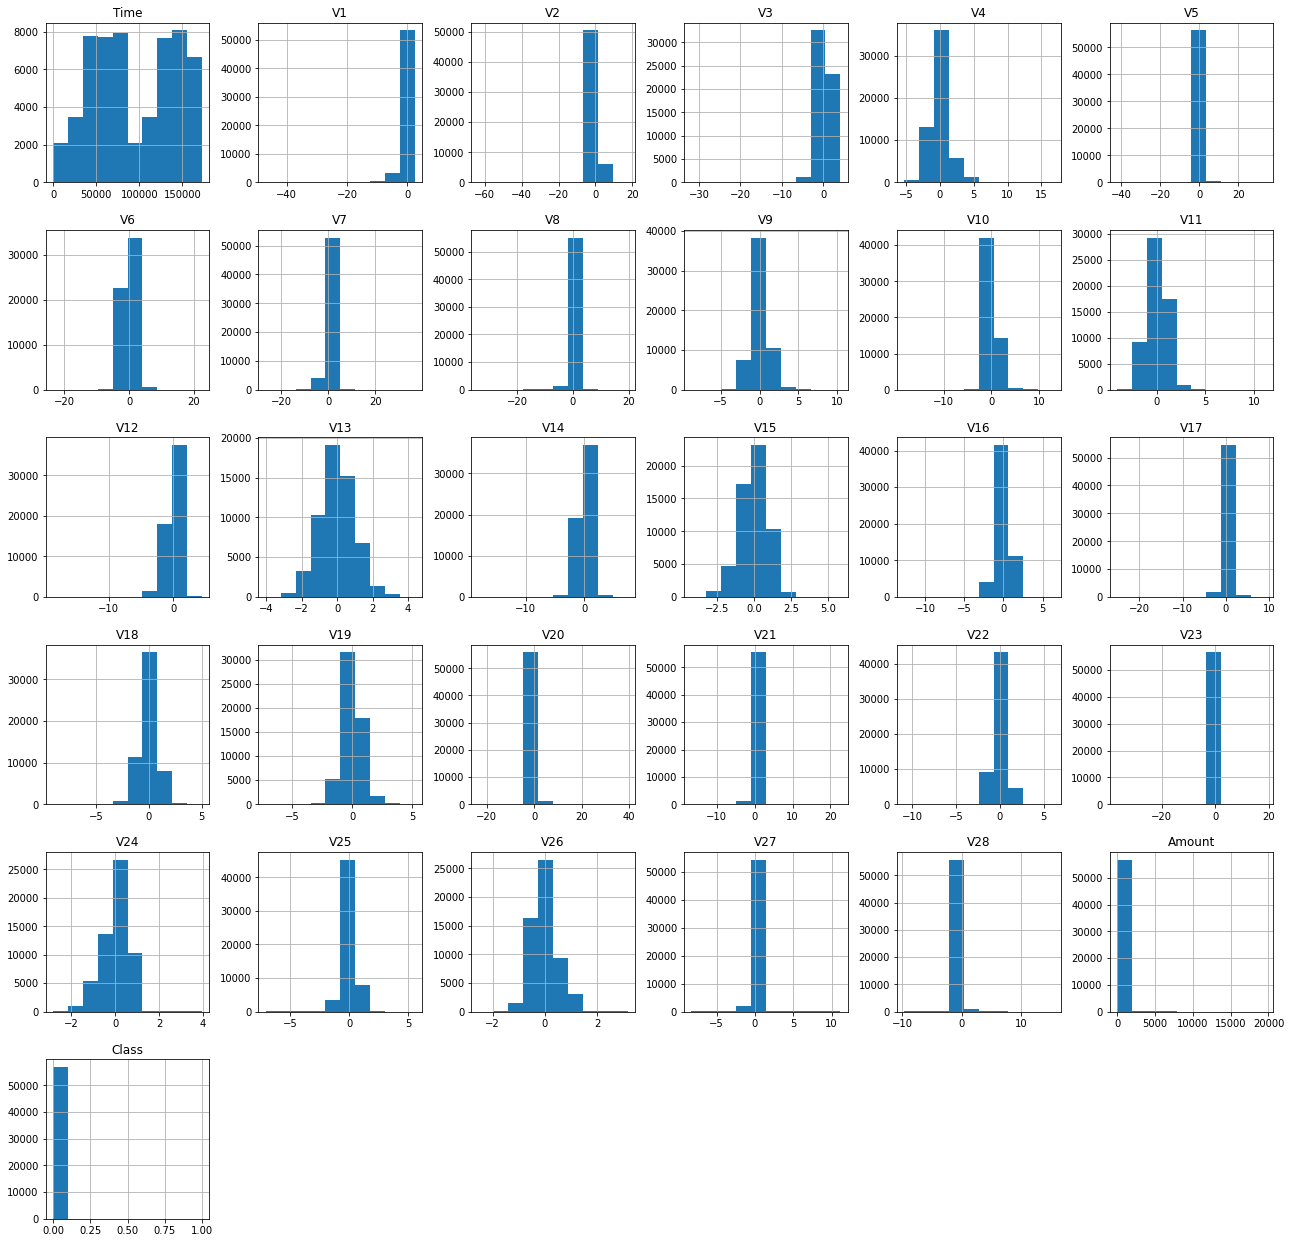

In [35]:
#visualising the histograms
df.hist(figsize=(22,22))
plt.show()
#here 'class' value 1 indicates fraudulent transaction and 0 indicates valid transaction

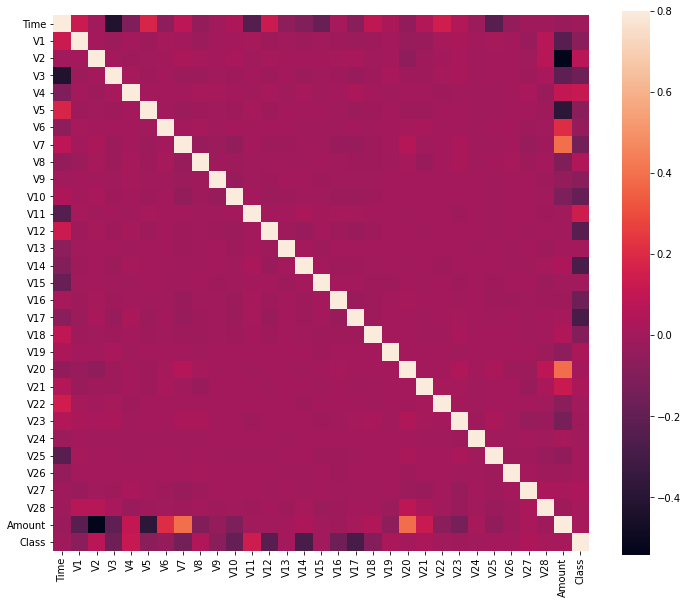

In [36]:
#visualising the correlations in dataset as seaborn heatmap
correlation=df.corr()
fig=plt.figure(figsize=(12,10))
sns.heatmap(correlation,vmax=0.8,square=True)
plt.show()

In [37]:
#let us obtain fraud rows and valid rows separately
fraud=df[df['Class']==1]
valid=df[df['Class']==0]
#number of fraud and valid rows
print("Number of fraudulent transactions: ",len(fraud))
print("Number of valid transactions: ",len(valid))
#fraction of fraudulent transactions
print("Fraction of fraudulent transactions: ",float(len(fraud))/len(valid))

Number of fraudulent transactions:  87
Number of valid transactions:  56874
Fraction of fraudulent transactions:  0.0015296972254457222


In [38]:
#getting all the columns from dataframe
cols=df.columns.tolist()
cols.remove('Class')
#removing column 'Class' as to separate label and data values and storing class as a vector
target_var='Class'
x=df[cols]
y=df[target_var]
print(x.shape);print(y.shape)

(56961, 30)
(56961,)


In [39]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#defining instance of algorithms to train the model
#dictionary algorithms

#Local Outlier Factor measures the local deviation of density of a given sample with respect to its neighbors.
#locality is given by k-nearest neighbours

#The Isolation Forest method returns the anomaly score of each sample using the IsolationForest algorithmThe IsolationForest ‘isolates’ observations by randomly selecting a feature and 
# then randomly selecting a split value between the maximum and minimum values of the selected feature.

#max_samples is the number of samples to draw from X to train each base estimator
# contamination is the proportion of outliers in the data set. 
#n_neighbors is number of neighbors to use by default for kneighbors queries

classifiers = {
    "Isolation Forest" : IsolationForest(max_samples=len(x),contamination=float(len(fraud))/len(valid),random_state=1),
    "Local Outlier Factor" : LocalOutlierFactor(n_neighbors=20,contamination=float(len(fraud))/len(valid))
}

In [40]:
#fitting the model
outlier_num=len(fraud)

for i,(name,clf) in enumerate(classifiers.items()):
    if(name=="Local Outlier Factor"):
        #fit predict fits the model to the training set x and returns the labels. -1 if outlier and +1 if inlier
        y_pred=clf.fit_predict(x)

        #negative_outlier_factor_ The opposite LOF of the training samples. The higher, the more normal. 
        # Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), 
        # while outliers tend to have a larger LOF score.
        # The LOF score is the average of the ratio of the local reachability 
        # density of a sample and those of its k-nearest neighbors.

        scores_pred=clf.negative_outlier_factor_

    else:
        #to fit the model to x
        clf.fit(x)

        #The anomaly score of an input sample is computed as the mean anomaly score of the trees in the forest.
        #The measure of normality of an observation given a tree is the depth of 
        # the leaf containing this observation, which is equivalent to the number of splittings required to 
        # isolate this point. 
        #decision function returns the average anomaly score
        scores_pred=clf.decision_function(x)

        #predict predicts if a particular sample is an outlier or not 
        y_pred=clf.predict(x)

    #reshaping the prediction values to 0 for valid, 1 for fraud
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1

    #getting number of errors
    num_errors=(y_pred!=y).sum()

    #printing name and classification metrics
    print("Method used: ",name)
    print("Number of errors: ",num_errors)
    print(accuracy_score(y,y_pred))
    print(classification_report(y,y_pred))
    print()

#here Local Outlier Factor algorithm gives very low precision and recall of 1% on credit card fraud cases 
# Isolation Forest gives 30% precision and recall 

Method used:  Isolation Forest
Number of errors:  127
0.997770404311722
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.27      0.28      0.27        87

    accuracy                           1.00     56961
   macro avg       0.64      0.64      0.64     56961
weighted avg       1.00      1.00      1.00     56961


Method used:  Local Outlier Factor
Number of errors:  173
0.9969628342199048
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.01      0.01      0.01        87

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961


